In [3]:
import numpy as np
from math import sqrt, sin, cos, pi, exp, ceil, factorial
from tabulate import tabulate

<h2>Pile axial capacity (Individual capacity)</h2>
  

<h3>$P_u = A_{ub} * S_{ub} * N_c + A_p * S_{ua} * α$ </h3>
   
$P_u$ Axial load capacity, $A_{ub}$ Area of pile base, $S_{ub}$ undrained shear strength of clay, $N_c$ bearing coefficient, $A_p$ surface area of pile group block, $S_{ua}$ shear strength of clay, $\alpha$ adhesion factor. </h3>

<h3> $A_{ub} = \frac{\pi D_p^2}{4} $ </h3>

<h3>$A_{p} = \pi D_p L_p $</h3>

$D_p$ diameter of pile, $L_p$ pile length 

<h3>$S_{ub} = \frac{q_u}{2}$</h3>
$q_u$ is the unconfined strength of clay

<h2> Pile loading </h2>
<h3>$Q_m = \frac{Q}{n} \pm \frac{M_y x}{\Sigma x^2} \pm \frac{M_x y}{\Sigma y^2}$</h3>
$Q_m$ Axial load on any pile m, $Q$ vertical loading @ center of pile group, $n$ is total number of piles, $M_x, M_y$ are moments about $x$ and $y$ respectively., and $x$ and $y$ distance of pile center from the center. 


<h2> Limit State Equation </h2>
<h3> $g = R - S $ </h3>
where $R$ is a function of $D_P, L_p,q_u$ 

<h3> $g = A_{ub} * S_{ub} * N_c + A_p * S_{ua} * α - \left( \frac{Q}{n} \pm \frac{M_y x}{\Sigma x^2} \pm \frac{M_x y}{\Sigma y^2}\right)$


# Monte Carlo Simulation


## Random variables:
### $D_p$ Diameter of Pile; $L_p$ Length of the pile, $q_u$ unconfined strength of clay, $Q$ vertical load, $n$ number of piles, $M_x , M_y$ moment in x and y; $x,  y$ distance of pile from centre

## define the random variables mean and CoV



In [4]:
# estimate the pile arrangement 
def plot_pile_distances_and_calculate_sums(n, distance_x, distance_y):
    """
    Plots piles on a grid with equal spacing between piles and distances to x and y axes.
    Also calculates and displays the sum of the squares of the distances to the axes.
    
    :param n: The number of piles (rows or columns)
    :param distance_x: The distance between piles along the x-axis.
    :param distance_y: The distance between piles along the y-axis.
    """
    # Calculate the total grid size in each direction based on distances and spacing
    total_x_size = (n - 1) * distance_x  # Total span in the x direction
    total_y_size = (n - 1) * distance_y  # Total span in the y direction
    
    # Create a grid of pile coordinates (i, j) where i and j range from 0 to n-1
    x_spacing = np.arange(n) * distance_x - total_x_size / 2  # Shift to center at 0
    y_spacing = np.arange(n) * distance_y - total_y_size / 2  # Shift to center at 0
    
    # Create meshgrid for the pile positions
    X, Y = np.meshgrid(x_spacing, y_spacing)
    
    # Calculate the sum of squared distances to the x-axis (based on Y coordinates)
    sum_squared_distances_x = np.sum(np.abs(Y)**2)
    
    # Calculate the sum of squared distances to the y-axis (based on X coordinates)
    sum_squared_distances_y = np.sum(np.abs(X)**2)
    
    # # Plot the pile positions (dots)
    # plt.figure(figsize=(8, 8))
    # plt.scatter(X, Y, c='blue', label='Piles', s=100, edgecolors='black', zorder=5)
    
    # # Display the distances on the plot
    # for i in range(n):
    #     for j in range(n):
    #         # Place the text either to the right or left depending on the X position
    #         if X[i, j] < 0:
    #             # Place label to the right of the dot
    #             plt.text(X[i, j] + 0.2, Y[i, j], f"({np.abs(Y[i, j])**2}, {np.abs(X[i, j])**2})", 
    #                      ha='left', va='center', fontsize=8, color='red', zorder=10)
    #         else:
    #             # Place label to the left of the dot
    #             plt.text(X[i, j] - 0.2, Y[i, j], f"({np.abs(Y[i, j])**2}, {np.abs(X[i, j])**2})", 
    #                      ha='right', va='center', fontsize=8, color='red', zorder=10)
    
    # # Set the axis limits and labels
    # plt.xlim(X.min() - distance_x / 2, X.max() + distance_x / 2)
    # plt.ylim(Y.min() - distance_y / 2, Y.max() + distance_y / 2)
    # plt.axhline(0, color='black',linewidth=1)
    # plt.axvline(0, color='black',linewidth=1)
    
    # # Adding grid and title
    # plt.grid(True)
    # plt.title(f'Pile Grid and Distances from Axes ({n}x{n} Grid) with Spacing {distance_x} and {distance_y}')
    
    # # Labeling axes
    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    
    # # Show the plot
    # plt.show()
    
    # Return the sum of the squared distances
    return sum_squared_distances_x, sum_squared_distances_y

# # Example usage: Plot for a 3x3 grid with equal spacing and given distances
# sum_x, sum_y = plot_pile_distances_and_calculate_sums(6, distance_x=1, distance_y=1)

# # Display the sum of squared distances
# print(f"Sum of squared distances to the X-axis: {sum_x}")
# print(f"Sum of squared distances to the Y-axis: {sum_y}")


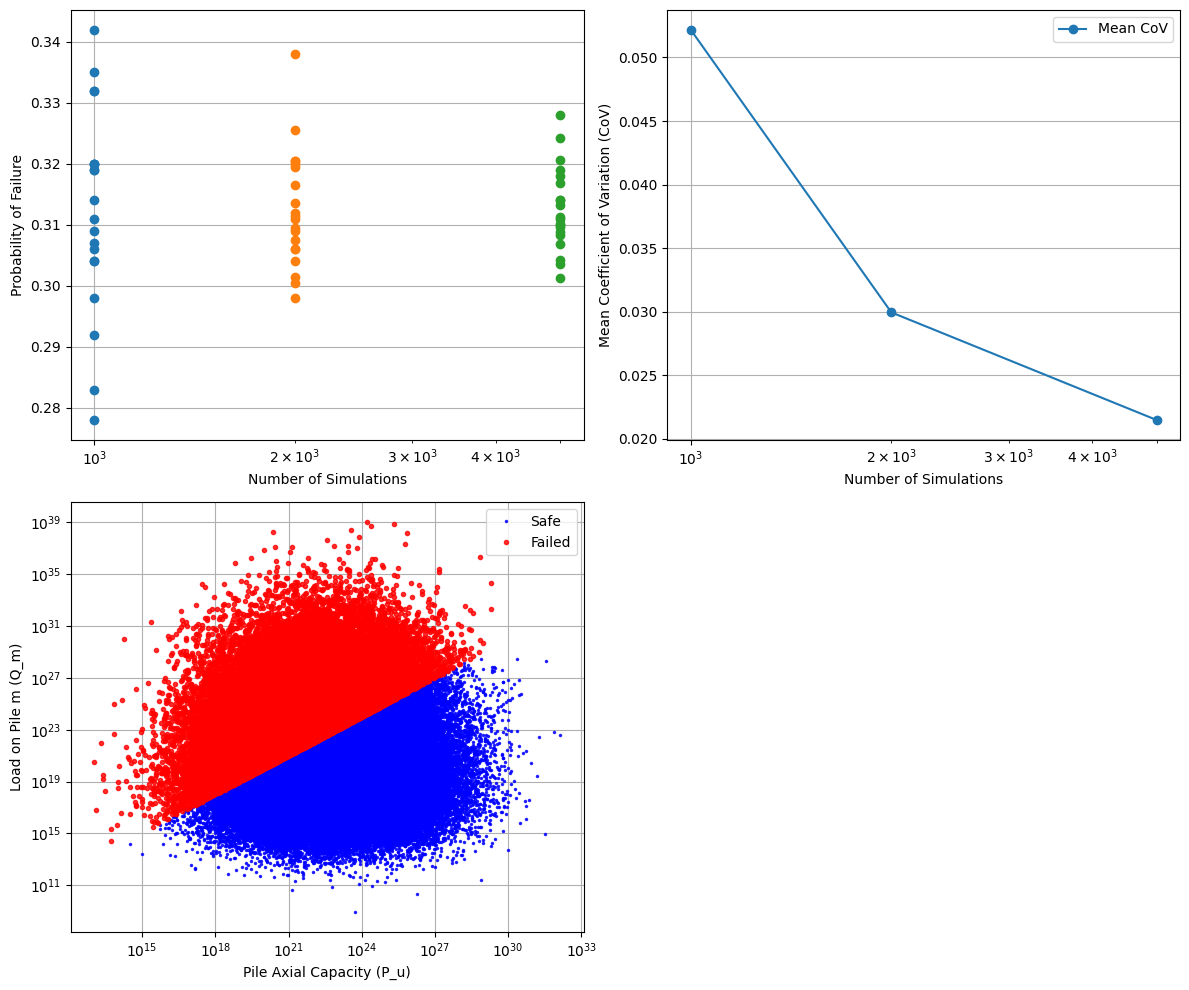

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# Define the number of simulation sets
simulation_sets = [1000, 2000, 5000]#, 10000, 20000, 50000, 100000, 150000, 200000, 500000, 1000000, 5000000]
repetitions = 20  # Repeat each simulation 10 times

# Define the distribution parameters (mean, standard deviation)
mu_Dp, sigma_Dp = 1.5, 0.2  # Diameter of pile (meters)
mu_Lp, sigma_Lp = 15, 3  # Length of pile (meters)
mu_qu, sigma_qu = 50, 5  # Unconfined strength (kPa)
mu_Q, sigma_Q = 50, 10  # Vertical load (kN)
n_min, n_max = 8, 100  # Number of piles
mu_Mx, sigma_Mx = 50, 5  # Moment in x (kNm)
mu_My, sigma_My = 50, 5  # Moment in y (kNm)
mu_x, sigma_x = 1.5, 0.5  # Distance from center in x (meters)
mu_y, sigma_y = 1.5, 0.5  # Distance from center in y (meters)

# Initialize a list to store the probabilities of failure for each simulation set
prob_failures = []

# Initialize lists to store all P_u and Q_m values
all_P_u = []
all_Q_m = []
f_Pu = []
f_Q = []
# Function to perform the Monte Carlo simulation for one set of simulations
def run_monte_carlo_simulation(n_simulations):
    # Generate random samples
    Dp_samples = np.array(np.random.normal(mu_Dp, sigma_Dp, n_simulations))
    #Dp_samples = stats.lognorm(sigma_Dp, scale=np.exp(mu_Dp)).rvs(n_simulations)#.astype(np.float64)
    Lp_samples = stats.lognorm(sigma_Lp, scale=np.exp(mu_Lp)).rvs(n_simulations)#.astype(np.float32)
    qu_samples = stats.lognorm(sigma_qu, scale=np.exp(mu_qu)).rvs(n_simulations)#.astype(np.float32)
    Q_samples = stats.lognorm(sigma_Q, scale=np.exp(mu_Q)).rvs(n_simulations)#.astype(np.float32)
    n_samples = np.random.randint(n_min, n_max, n_simulations)#.astype(np.int32)
    Mx_samples = stats.lognorm(sigma_Mx, scale=np.exp(mu_Mx)).rvs(n_simulations)#.astype(np.float32)
    My_samples = stats.lognorm(sigma_My, scale=np.exp(mu_My)).rvs(n_simulations)#.astype(np.float32)
    x_samples = stats.lognorm(sigma_x, scale=np.exp(mu_x)).rvs(n_simulations)#.astype(np.float32)
    y_samples = stats.lognorm(sigma_y, scale=np.exp(mu_y)).rvs(n_simulations)#.astype(np.float32)

    # Initialize results
    g_samples = []
     # Initialize lists for the results
    P_u_set = []
    Q_m_set = []

    failure_P_u = []  # To store P_u values where g < 0
    failure_Q_m = []  # To store Q_m values where g < 0
    # Perform the simulation
    for i in range(n_simulations):
        # Calculate areas
        A_ub = np.pi * Dp_samples[i]**2 / 4
        A_p = np.pi * Dp_samples[i] * Lp_samples[i]
        
        # Calculate shear strengths
        S_ub = qu_samples[i] / 2
        S_ua = qu_samples[i]/ 2  # Assuming same for simplicity, adjust as needed
        sum_x, sum_y = plot_pile_distances_and_calculate_sums(n_samples[i], distance_x=x_samples[i], distance_y=y_samples[i])
        # Calculate pile axial capacity
        P_u = A_ub * S_ub * 9 + A_p * S_ua * 83.54*S_ua**(-1.032)  # Assuming Nc and alpha are constants for simplicity
        # P_u_set.append(P_u)
        # Calculate load on pile m
        Q_m = (Q_samples[i] / n_samples[i]) + (My_samples[i] * x_samples[i] )/ (sum_x) + (Mx_samples[i] * y_samples[i] )/ (sum_y)
        # Q_m_set.append(Q_m)
        # Calculate limit state
        g = P_u - Q_m
        
        # Store the results
        g_samples.append(g)
        
        # If g < 0, this indicates failure, so store P_u and Q_m values
        if g < 0:
            failure_P_u.append(P_u)
            failure_Q_m.append(Q_m)
        else:
            P_u_set.append(P_u)
            Q_m_set.append(Q_m)
            

    # Convert to array for easy manipulation
    g_samples = np.array(g_samples)

    # Calculate probability of failure (g <0)
    prob_failure = np.sum(g_samples <0) / n_simulations
    return prob_failure, P_u_set, Q_m_set, failure_P_u, failure_Q_m

# Run simulations for each number of simulations and store results
for simulations in simulation_sets:
    prob_failures_for_repeats = []
    
    for _ in range(repetitions):
        pf, P_u, Q_m, FPu, FQ = run_monte_carlo_simulation(simulations)
        # plt.figure(figsize=(8, 6))
        # plt.plot(P_u, Q_m, marker = '.', color = 'b', linestyle='none', alpha=1, label=_, markersize=10)
        # plt.plot(FPu, FQ, marker = '.', color = 'r', linestyle='none', alpha=1, label=_, markersize=10)
        # plt.legend()
        # plt.xlim([-1e7,1e7])
        # plt.ylim([-1e7,1e7])
        # # plt.yscale('log')
        # # plt.xscale('log')
        # # Adjust layout and show the plot
        # plt.tight_layout()
        # plt.show()
        
        prob_failures_for_repeats.append(pf)
        all_P_u.extend(P_u)
        all_Q_m.extend(Q_m)
        f_Pu.extend(FPu)
        f_Q.extend(FQ)
    
    prob_failures.append(prob_failures_for_repeats)

# Calculate the mean CoV for each simulation set
mean_cov = []

for pf_set in prob_failures:
    mean_pf = np.mean(pf_set)
    std_pf = np.std(pf_set)
    cov = std_pf / mean_pf  # Coefficient of variation (CoV)
    mean_cov.append(cov)

# Plot the mean CoV vs Number of Simulations
plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)

for i, simulations in enumerate(simulation_sets):
    plt.plot([simulations] * repetitions, prob_failures[i], 'o', label=f"{simulations} Simulations")

# plt.title('Probability of Failure vs Number of Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Failure')
plt.xticks(simulation_sets)  # Ensure only the simulation sets are shown on the x-axis
plt.xscale('log')
#plt.legend(title='Number of Simulations')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(simulation_sets, mean_cov, 'o-', label='Mean CoV')
# plt.title('Mean CoV of Probability of Failure vs Number of Simulations')
plt.xlabel('Number of Simulations')
plt.ylabel('Mean Coefficient of Variation (CoV)')
plt.xscale('log')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.plot(all_P_u, all_Q_m, marker = '.', linestyle='none', alpha=0.8, color='b', label='Safe', markersize=3)
# plt.plot(np.sum(all_P_u)/len(all_P_u), np.sum(all_Q_m)/len(all_Q_m), marker = '.', linestyle='none', alpha=0.8, color='r', label='Failed', markersize=3)
plt.plot(f_Pu, f_Q, marker = 'o', linestyle='none', alpha=0.8, color='r', label='Failed', markersize=3)
# plt.axhline(y = np.mean(all_Q_m), color='k', linestyle='--', linewidth=1) 
# plt.axvline(x=np.mean(all_P_u), color='k', linestyle='--', linewidth=1)

# plt.scatter(np.mean(all_P_u), np.mean(all_Q_m), marker = 'o', alpha=1, color='r')#, label='All Simulations')
# plt.title('P_u vs Q_m for All Simulations')
plt.xlabel('Pile Axial Capacity (P_u)')
plt.ylabel('Load on Pile m (Q_m)')
# plt.xlim([0, 1e13])
# plt.ylim([0, 1e13])
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()

# plt.subplot(2,2,4)
# # Plot histogram of all P_u
# plt.hist(all_P_u, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='P_u (Pile Axial Capacity)')
# # Plot histogram of all Q_m
# plt.hist(all_Q_m, bins=30, color='salmon', edgecolor='black', alpha=0.7, label='Q_m (Load on Pile m)')
# # Add title and labels
# plt.title('Histogram of All P_u and All Q_m')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# # Add legend to differentiate the histograms
# plt.legend()
# # Display grid
# plt.grid(True)

# Plot KDE for P_u (Pile Axial Capacity)
# sns.kdeplot(all_P_u, color='skyblue', fill=True, label='P_u (Pile Axial Capacity)', alpha=0.7)

# Plot KDE for Q_m (Load on Pile m)
# sns.kdeplot(all_Q_m, color='salmon', fill=True, label='Q_m (Load on Pile m)', alpha=0.7)


# Show the plot
plt.tight_layout()
plt.show()